# Learning CNN with MNIST

In [1]:
!pip install tensorflowjs

In [5]:
!pip install scikit-learn

  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.9 MB ? eta -:--:--
   -------- ------------------------------- 1.8/8.9 MB 6.7 MB/s eta 0:00:02
   ----------- ---------------------------- 2.6/8.9 MB 5.6 MB/s eta 0:00:02
   -------------- ------------------------- 3.1/8.9 MB 4.5 MB/s eta 0:00:02
   --------------- ------------------------ 3.4/8.9 MB 3.9 MB/s eta 0:00:02
   ----------------- ---------------------- 3.9/8.9 MB 3.4 MB/s eta 0:00:02
   --------------------- ------------------ 4.7/8.9 MB 3.4 MB/s eta 0:00:02
   ------------------------- -------------- 5.8/8.9 MB 3.6 MB/s eta 0:00:01
   ----------------------------- ---------- 6.6/8.9 MB 3.7 MB/s eta 0:00:01
   ----------------------------------- ---- 7.9/8.9 MB 4.0 MB/s eta 0:00:01
   ------------------------------------- -- 8.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from sklearn.metrics import confusion_matrix

## Loading and understanding data







In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [8]:
# Check shapes of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


In [9]:
# Check unique values in target variables
print(f"Unique values in y_train: {np.unique(y_train)}")
print(f"Unique values in y_test: {np.unique(y_test)}\n")

Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique values in y_test: [0 1 2 3 4 5 6 7 8 9]



## Visualizing some data




5


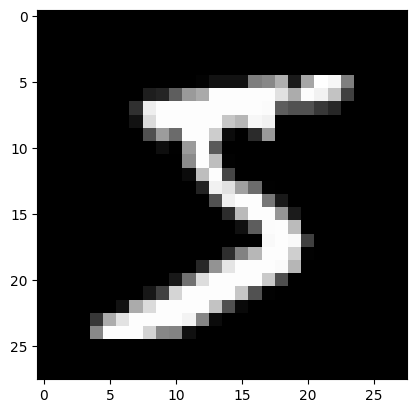

In [10]:
plt.imshow(x_train[0], cmap='gray')
print(y_train[0])

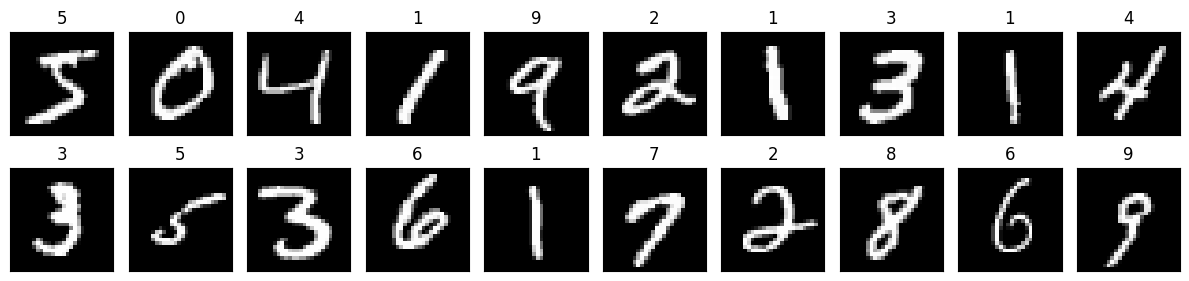

In [11]:
def visualize_images(data):
    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(12,3))

    for i, ax in enumerate(axes.flat):
        ax.imshow(x_train[i], cmap='gray')
        ax.set_xticks([]), ax.set_yticks([])
        ax.set_title(str(y_train[i]))

    plt.tight_layout()
    plt.show()

visualize_images(x_train)

## Normalizing data between 0 - 1

In [12]:
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [15]:
x_train.shape[1:]

(28, 28, 1)

## Model Building

Conv → Pool → Conv → Pool → Flatten → Dense

In [16]:
# input shape >> (28, 28, 1)
inputs = Input(batch_shape=(None, 28, 28, 1), name='input_layer')

x = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', name='conv1')(inputs)
x = Conv2D(filters=32, kernel_size=(3,3), activation='relu', name='conv2')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.25)(x)


x = Conv2D(filters=64, kernel_size=(3,3), activation='relu', name='conv3' )(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)

# dense layers
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(10, activation='softmax')(x)

# Create model
model = Model(inputs=inputs, outputs=outputs)

# compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 conv1 (Conv2D)              (None, 28, 28, 32)        320       
                                                                 
 conv2 (Conv2D)              (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv3 (Conv2D)              (None, 11, 11, 64)        18496     
                                                             

In [18]:
history = model.fit(x_train, y_train, epochs=8, validation_data=(x_test, y_test))


Epoch 1/8


1875/1875 [==============================] - 49s 25ms/step - loss: 0.2307 - accuracy: 0.9274 - val_loss: 0.0474 - val_accuracy: 0.9837
Epoch 2/8
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0884 - accuracy: 0.9739 - val_loss: 0.0297 - val_accuracy: 0.9902
Epoch 3/8
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0693 - accuracy: 0.9801 - val_loss: 0.0266 - val_accuracy: 0.9912
Epoch 4/8
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0592 - accuracy: 0.9830 - val_loss: 0.0223 - val_accuracy: 0.9920
Epoch 5/8
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0507 - accuracy: 0.9847 - val_loss: 0.0188 - val_accuracy: 0.9935
Epoch 6/8
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0465 - accuracy: 0.9859 - val_loss: 0.0195 - val_accuracy: 0.9931
Epoch 7/8
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0424 - accuracy: 0.9869 - val_loss: 0.0196 - val_

## Train & Test Accuracy and Loss¶

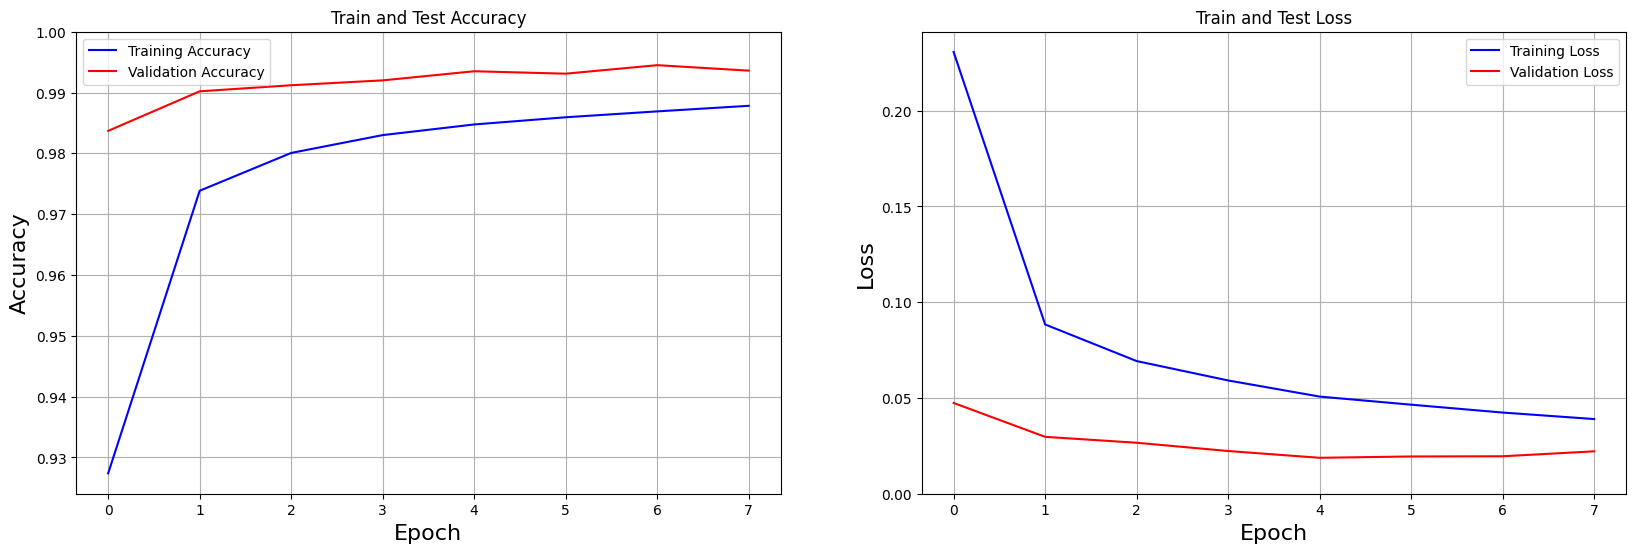

In [19]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Train and Test Accuracy')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend()
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Train and Test Loss')
plt.grid(True)
plt.show()

## Confusion Matrix

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [20]:
model.predict(x_test[0].reshape(1, 28, 28, 1))

1/1 [==============================] - 0s 193ms/step


array([[5.2317790e-14, 3.4327492e-09, 2.0924753e-08, 6.3318911e-10,
        2.1987567e-10, 1.1051562e-12, 6.3085752e-18, 1.0000000e+00,
        2.2677717e-12, 3.2604632e-08]], dtype=float32)

## Looking into model

In [ ]:
test_img = x_test[0].reshape(1, 28, 28, 1)

layer_names = ['conv1', 'conv2', 'conv3']
layer_outputs = [model.get_layer(name).output for name in layer_names]

# Visualization model
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Get the feature maps for the image
activations = activation_model.predict(test_img)

plt.figure(figsize=(15, 5))

for i, activation in enumerate(activations):
    plt.subplot(1, 3, i + 1)

    # We take the average of all filters (channels) to see the overall focus
    # For conv1 (32 filters), this averages those 32 images into one
    feature_map = np.mean(activation, axis=-1)

    plt.imshow(feature_map[0], cmap='viridis')
    plt.title(f"Layer: {layer_names[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 1. Get the activation for just the first layer (conv1)
first_layer_activation = activations[0] # From our previous activation_model.predict code

# 2. Create a 4x8 grid to show all 32 filters
plt.figure(figsize=(16, 8))

for i in range(32):
    plt.subplot(4, 8, i + 1)

    # Each filter 'i' is visualized here
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
    plt.title(f"Filt {i+1}", fontsize=8)
    plt.axis('off')

plt.suptitle("Output of all 32 Filters in conv1")
plt.show()

## Export model

In [30]:
# Now save and convert again
model.save("mnist.h5")

C:\Users\abhijit\miniconda3\envs\MNIST\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
!tensorflowjs_converter \
  --input_format=keras \
  mnist.h5 \
  mnist_tfjs



Traceback (most recent call last):
  File "C:\Users\abhijit\miniconda3\envs\MNIST\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\abhijit\miniconda3\envs\MNIST\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\abhijit\miniconda3\envs\MNIST\Scripts\tensorflowjs_converter.exe\__main__.py", line 2, in <module>
  File "C:\Users\abhijit\miniconda3\envs\MNIST\lib\site-packages\tensorflowjs\__init__.py", line 21, in <module>
    from tensorflowjs import converters
  File "C:\Users\abhijit\miniconda3\envs\MNIST\lib\site-packages\tensorflowjs\converters\__init__.py", line 21, in <module>
    from tensorflowjs.converters.converter import convert
  File "C:\Users\abhijit\miniconda3\envs\MNIST\lib\site-packages\tensorflowjs\converters\converter.py", line 38, in <module>
    from tensorflowjs.converters import tf_saved_model_conversion_v2
  File "C:\Users\abhijit\miniconda3\envs\MNIST\lib\site-packages\

In [28]:
!pip install tensorflow-decision-forests==1.8.1

  Using cached tensorflow_decision_forests-1.8.1-cp310-cp310-win_amd64.whl
